In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
d = pd.read_csv('cumulative-co-emissions.csv')

In [3]:
d.head()

,Entity,Code,Year,Cumulative CO₂ emissions by nation (tonnes)
0,Afghanistan,AFG,1751,0
1,Afghanistan,AFG,1752,0
2,Afghanistan,AFG,1753,0
3,Afghanistan,AFG,1754,0
4,Afghanistan,AFG,1755,0


In [4]:
Indexes = []
for i in range(len(d)):
    if (d['Entity'][i]=='Colombia'):
        Indexes.append(i)

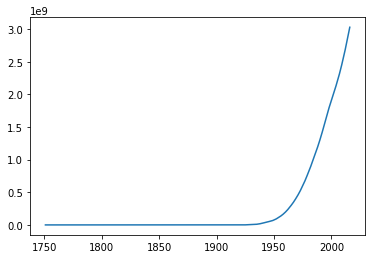

In [5]:
plt.plot(d['Year'][12549:12815], d['Cumulative CO₂ emissions by nation (tonnes)'][12549:12815])

In [6]:
Year = d['Year'][12549:12815]
Data = d['Cumulative CO₂ emissions by nation (tonnes)'][12549:12815]
Data= (Data*1e6/44.)/1e13

In [7]:
f = lambda x, A, u, sigma: A*(1/(2*np.pi*sigma))*np.exp(-(0.5)*((x-u)/sigma)**2)

In [8]:
x = np.linspace(-10, 10, 100)
y = f(x, 1, 0, 1)

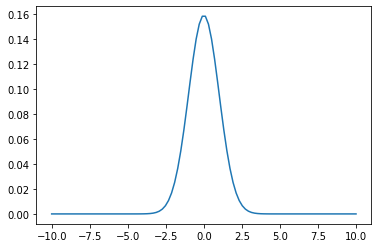

In [9]:
plt.plot(x, y)

In [10]:
popt, pcov = curve_fit(f, Year, Data, p0=[1e9, 2000, 1.5])
Year

12549    1751
12550    1752
12551    1753
12552    1754
12553    1755
         ... 
12810    2012
12811    2013
12812    2014
12813    2015
12814    2016
Name: Year, Length: 266, dtype: int64

In [11]:
Years = np.linspace(1751, 2200, 1000)
Y = f(Years, *popt)

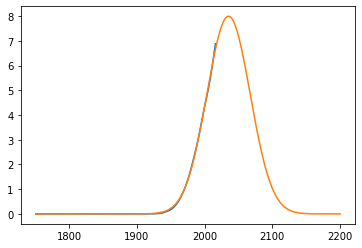

In [12]:
plt.figure()
plt.plot(d['Year'][12549:12815], Data)
plt.plot(Years, Y)

In [13]:
popt

array([1605.95191803, 2035.33786738,   31.95688926])

In [14]:
f = lambda x: (1605.95191803*(1/(2*np.pi*31.95688926))*np.exp(-(0.5)*((x-2035.33786738)/31.95688926)**2))

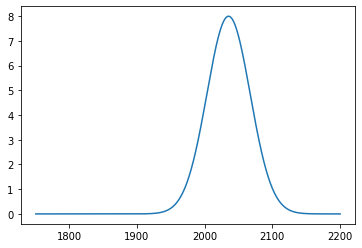

In [15]:
plt.plot(Years, f(Years))

In [16]:
d_default = 8.64
mu_1_default = 4.95*100
mu_2_default = 4.95*0.01
v_s_default = 0.12
v_d_default = 1.23
w_default = 0.001



corat=0.25
prod=0.000175
watemp=288.
k_1_default = (1 + corat)*prod
k_2_default = (2.*corat -0.15)*prod
k_3_default = 1-4.*(0.000575+0.000006*(watemp-278))
k_4_default = 6.79e-2#0.035 + 0.0019*(watemp-278)
print (k_1_default,k_2_default,k_3_default,k_4_default)

0.00021875 6.125e-05 0.99746 0.0679


In [17]:
     
def RK4(a0, b0, x0, y0, z0, t0, h, F5, F4, F3, F2, F1):

    ka1 = h*F5(a0, b0, x0, y0, z0, t0)
    kb1 = h*F4(a0, b0, x0, y0, z0, t0)
    kx1 = h*F3(a0, b0, x0, y0, z0, t0)
    ky1 = h*F2(a0, b0, x0, y0, z0, t0)
    kz1 = h*F1(a0, b0, x0, y0, z0, t0)
    
    ka2 = h*F5(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    kb2 = h*F4(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    kx2 = h*F3(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    ky2 = h*F2(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    kz2 = h*F1(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    
    ka3 = h*F5(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    kb3 = h*F4(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    kx3 = h*F3(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    ky3 = h*F2(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    kz3 = h*F1(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    
    ka4 = h*F5(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    kb4 = h*F4(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    kx4 = h*F3(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)     
    ky4 = h*F2(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    kz4 = h*F1(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    
    an = a0 + (1/6.)*(ka1 + 2*ka2 + 2*ka3 + ka4)
    bn = b0 + (1/6.)*(kb1 + 2*kb2 + 2*kb3 + kb4)
    xn = x0 + (1/6.)*(kx1 + 2*kx2 + 2*kx3 + kx4)
    yn = y0 + (1/6.)*(ky1 + 2*ky2 + 2*ky3 + ky4) 
    zn = z0 + (1/6.)*(kz1 + 2*kz2 + 2*kz3 + kz4)
    
    return [an,bn,xn,yn,zn]

In [18]:
def F5(p, sigma_s, sigma_d, alpha_s, alpha_d, t):
    
    h_s = (sigma_s -(sigma_s**2 - k_3_default*alpha_s*(2*sigma_s-alpha_s))**(0.5))/k_3_default
    c_s = (alpha_s - h_s)/2
    p_s = k_4_default*(h_s)**2/c_s
    
    F5 = (p_s - p)/d_default + f(t)/mu_1_default
    
    return F5

def F4(p, sigma_s, sigma_d, alpha_s, alpha_d, t):
    
    h_s = (sigma_s -(sigma_s**2 - k_3_default*alpha_s*(2*sigma_s-alpha_s))**(0.5))/k_3_default
    c_s = (alpha_s - h_s)/2
    p_s = k_4_default*(h_s)**2/c_s
    
    F4 = (w_default*(sigma_d - sigma_s) - k_1_default - mu_2_default*(p_s-p)/d_default)/v_s_default
    
    return F4

def F3(p, sigma_s, sigma_d, alpha_s, alpha_d, t):

    F3 = (k_1_default - w_default*(sigma_d - sigma_s))/v_d_default
    
    return F3

def F2(p, sigma_s, sigma_d, alpha_s, alpha_d, t):

    F2 = (w_default*(alpha_d - alpha_s) - k_2_default)/v_s_default
    
    return F2

def F1(p, sigma_s, sigma_d, alpha_s, alpha_d, t):
    
    F1 = (k_2_default - w_default*(alpha_d - alpha_s))/v_d_default
    
    return F1
    

In [19]:
Numpuntos=np.array([10,100,1000,10000,1000000])

p_initial = 1.00
sigma_s_initial = 2.01
sigma_d_initial = 2.23
alpha_s_initial = 2.20
alpha_d_initial = 2.26 
t_initial = 1000.
t_final = 5000.

In [20]:
p_sol = []
sigma_s_sol = []
sigma_d_sol = []
alpha_s_sol = []
alpha_d_sol = []

H=(t_final-t_initial)/Numpuntos

In [21]:
T=np.linspace(t_initial, t_final, Numpuntos[3])

p_sol.append(p_initial)
sigma_s_sol.append(sigma_s_initial)
sigma_d_sol.append(sigma_d_initial)
alpha_s_sol.append(alpha_s_initial)
alpha_d_sol.append(alpha_d_initial)



h=np.abs(t_final-t_initial)/Numpuntos[3]

#V=[p_initial, sigma_s_initial, sigma_d_initial, alpha_s_initial, alpha_d_initial]
for i in T[1:]:
    
    pn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[0]
    sigma_sn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[1]
    sigma_dn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[2]
    alpha_sn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[3]
    alpha_dn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[4]
    #V[0],V[1],V[2],V[3],V[4] = pn, sigma_sn, sigma_dn, alpha_sn, alpha_dn
    
    p_sol.append(pn)
    sigma_s_sol.append(sigma_sn)
    sigma_d_sol.append(sigma_dn)
    alpha_s_sol.append(alpha_sn)
    alpha_d_sol.append(alpha_dn)
    

In [22]:
len(T),len(p_sol)

(10000, 10000)

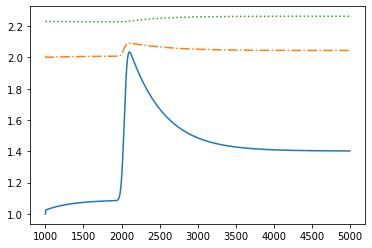

In [23]:
plt.plot(T,p_sol)
plt.plot(T,sigma_s_sol,'-.')
plt.plot(T,sigma_d_sol,':')

#plt.ylim(0,10)